In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
sns.set()

In [2]:
df_raw=pd.read_csv('train_s3TEQDk.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [3]:
df_ffill=df_raw.fillna(method="ffill",axis=0)
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
df_bfill=df_raw.fillna(method="bfill",axis=0)
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
df_ffill['Credit_Product'].value_counts()

No     163751
Yes     81974
Name: Credit_Product, dtype: int64

In [6]:
df_bfill['Credit_Product'].value_counts()

No     163920
Yes     81805
Name: Credit_Product, dtype: int64

In [7]:
df_yes=df_raw.copy()
df_yes['Credit_Product'].replace(np.nan,'Yes',inplace=True)
df_yes['Credit_Product'].value_counts()

No     144357
Yes    101368
Name: Credit_Product, dtype: int64

<ipython-input-8-322fef57ed21>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])


Feature Age: 10992.019910
Feature Vintage: 16875.145658
Feature Avg_Account_Balance: 1021.921892
Feature RG250: 77.780573
Feature RG251: 0.941242
Feature RG252: 187.484921
Feature RG253: 6.369940
Feature RG254: 87.880540
Feature RG255: 0.647321
Feature RG256: 124.701975
Feature RG257: 52.183004
Feature RG258: 1.488879
Feature RG259: 9.696454
Feature RG260: 27.594910
Feature RG261: 169.162304
Feature RG262: 18.731212
Feature RG263: 3.800655
Feature RG264: 107.990905
Feature RG265: 5.269674
Feature RG266: 64.060956
Feature RG267: 53.759319
Feature RG268: 709.146903
Feature RG269: 9.180613
Feature RG270: 306.075644
Feature RG271: 38.839803
Feature RG272: 11.838138
Feature RG273: 0.003624
Feature RG274: 152.362182
Feature RG275: 55.945422
Feature RG276: 21.091944
Feature RG277: 0.916922
Feature RG278: 1.734665
Feature RG279: 2.596100
Feature RG280: 0.149835
Feature RG281: 5.777675
Feature RG282: 57.597015
Feature RG283: 629.071313
Feature RG284: 372.976181
Feature Occupation_Entrepreneur: 

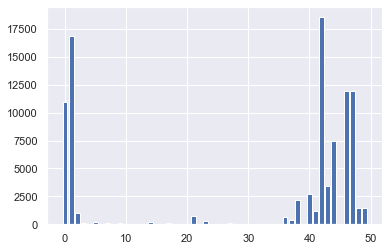

In [8]:
dummies_Gender=pd.get_dummies(df_ffill['Gender'])
dummies_Region=pd.get_dummies(df_ffill['Region_Code'])
dummies_Occupation=pd.get_dummies(df_ffill['Occupation'])
dummies_Channel=pd.get_dummies(df_ffill['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_ffill['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_ffill['Is_Active'])

df_ffill['Gender_Male']=dummies_Gender['Male']
df_ffill['Gender_Female']=dummies_Gender['Female']


df_ffill[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]



df_ffill['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_ffill['Occupation_Other']=dummies_Occupation['Other']
df_ffill['Occupation_Salaried']=dummies_Occupation['Salaried']
df_ffill['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_ffill['Channel_X1']=dummies_Channel['X1']
df_ffill['Channel_X2']=dummies_Channel['X2']
df_ffill['Channel_X3']=dummies_Channel['X3']
df_ffill['Channel_X4']=dummies_Channel['X4']
df_ffill['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_ffill['CreditProduct_No']=dummies_CreditProduct['No']
df_ffill['IsActive_Yes']=dummies_IsActive['Yes']
df_ffill['IsActive_No']=dummies_IsActive['No']


df_ffill=df_ffill.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)


X=df_ffill[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
       'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258',
       'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266',
       'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274',
       'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'Channel_X4', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y=df_ffill[['Is_Lead']]

X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, np.ravel(Y), test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
col=X.columns
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (col[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
X1=df_ffill[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
        'RG252', 'RG254', 'RG256',
       'RG261',  'RG264',  'RG268', 'RG270', 'RG274',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y1=df_ffill['Is_Lead']
X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


<ipython-input-9-950b3e0a5e43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


In [10]:
rf_tuned= RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_depth=21,
 bootstrap=True)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)
rf_tuned.fit(X_train_scaled1, np.ravel(Y))

RandomForestClassifier(max_depth=21, min_samples_leaf=4, n_estimators=200)

In [11]:
df_test=pd.read_csv('test_mSzZ8RL.csv')
df_ffill_test=df_test.fillna(method="ffill",axis=0)

In [12]:
dummies_Gender=pd.get_dummies(df_ffill_test['Gender'])
dummies_Region=pd.get_dummies(df_ffill_test['Region_Code'])
dummies_Occupation=pd.get_dummies(df_ffill_test['Occupation'])
dummies_Channel=pd.get_dummies(df_ffill_test['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_ffill_test['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_ffill_test['Is_Active'])
df_ffill_test['Gender_Male']=dummies_Gender['Male']
df_ffill_test['Gender_Female']=dummies_Gender['Female']
df_ffill_test[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]
df_ffill_test['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_ffill_test['Occupation_Other']=dummies_Occupation['Other']
df_ffill_test['Occupation_Salaried']=dummies_Occupation['Salaried']
df_ffill_test['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_ffill_test['Channel_X1']=dummies_Channel['X1']
df_ffill_test['Channel_X2']=dummies_Channel['X2']
df_ffill_test['Channel_X3']=dummies_Channel['X3']
df_ffill_test['Channel_X4']=dummies_Channel['X4']
df_ffill_test['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_ffill_test['CreditProduct_No']=dummies_CreditProduct['No']
df_ffill_test['IsActive_Yes']=dummies_IsActive['Yes']
df_ffill_test['IsActive_No']=dummies_IsActive['No']
df_ffill_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105312 non-null  object
 1   Gender                    105312 non-null  object
 2   Age                       105312 non-null  int64 
 3   Region_Code               105312 non-null  object
 4   Occupation                105312 non-null  object
 5   Channel_Code              105312 non-null  object
 6   Vintage                   105312 non-null  int64 
 7   Credit_Product            105312 non-null  object
 8   Avg_Account_Balance       105312 non-null  int64 
 9   Is_Active                 105312 non-null  object
 10  Gender_Male               105312 non-null  uint8 
 11  Gender_Female             105312 non-null  uint8 
 12  RG250                     105312 non-null  uint8 
 13  RG251                     105312 non-null  uint8 
 14  RG25

In [13]:
df_ffill_test=df_ffill_test.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)

In [14]:
test_features=df_ffill_test[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
        'RG252', 'RG254', 'RG256',
       'RG261',  'RG264',  'RG268', 'RG270', 'RG274',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])



<ipython-input-14-8d62b8b5dcb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])


In [15]:
X_test_scaled = scaler.fit_transform(test_features)
df_test['Is_Lead_rf_tune']=rf_tuned.predict(X_test_scaled)
df_output1=pd.DataFrame()
df_output1[['ID','Is_Lead']]=df_test[['ID','Is_Lead_rf_tune']]
df_output1.to_csv('Output_rf_tune_scaled_ffill.csv',index=False)

# Backfill

<ipython-input-16-27935418d673>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])


Feature Age: 10992.019910
Feature Vintage: 16875.145658
Feature Avg_Account_Balance: 1021.921892
Feature RG250: 77.780573
Feature RG251: 0.941242
Feature RG252: 187.484921
Feature RG253: 6.369940
Feature RG254: 87.880540
Feature RG255: 0.647321
Feature RG256: 124.701975
Feature RG257: 52.183004
Feature RG258: 1.488879
Feature RG259: 9.696454
Feature RG260: 27.594910
Feature RG261: 169.162304
Feature RG262: 18.731212
Feature RG263: 3.800655
Feature RG264: 107.990905
Feature RG265: 5.269674
Feature RG266: 64.060956
Feature RG267: 53.759319
Feature RG268: 709.146903
Feature RG269: 9.180613
Feature RG270: 306.075644
Feature RG271: 38.839803
Feature RG272: 11.838138
Feature RG273: 0.003624
Feature RG274: 152.362182
Feature RG275: 55.945422
Feature RG276: 21.091944
Feature RG277: 0.916922
Feature RG278: 1.734665
Feature RG279: 2.596100
Feature RG280: 0.149835
Feature RG281: 5.777675
Feature RG282: 57.597015
Feature RG283: 629.071313
Feature RG284: 372.976181
Feature Occupation_Entrepreneur: 

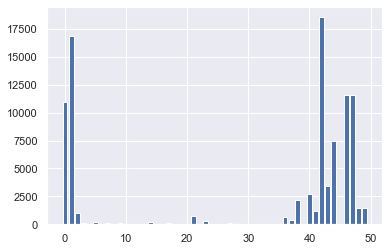

In [16]:
dummies_Gender=pd.get_dummies(df_bfill['Gender'])
dummies_Region=pd.get_dummies(df_bfill['Region_Code'])
dummies_Occupation=pd.get_dummies(df_bfill['Occupation'])
dummies_Channel=pd.get_dummies(df_bfill['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_bfill['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_bfill['Is_Active'])

df_bfill['Gender_Male']=dummies_Gender['Male']
df_bfill['Gender_Female']=dummies_Gender['Female']


df_bfill[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]



df_bfill['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_bfill['Occupation_Other']=dummies_Occupation['Other']
df_bfill['Occupation_Salaried']=dummies_Occupation['Salaried']
df_bfill['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_bfill['Channel_X1']=dummies_Channel['X1']
df_bfill['Channel_X2']=dummies_Channel['X2']
df_bfill['Channel_X3']=dummies_Channel['X3']
df_bfill['Channel_X4']=dummies_Channel['X4']
df_bfill['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_bfill['CreditProduct_No']=dummies_CreditProduct['No']
df_bfill['IsActive_Yes']=dummies_IsActive['Yes']
df_bfill['IsActive_No']=dummies_IsActive['No']


df_bfill=df_bfill.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)


X=df_bfill[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
       'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258',
       'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266',
       'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274',
       'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'Channel_X4', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y=df_bfill[['Is_Lead']]

X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, np.ravel(Y), test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
col=X.columns
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (col[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [17]:
X1=df_bfill[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
        'RG252', 'RG254', 'RG256',
       'RG261',  'RG264',  'RG268', 'RG270', 'RG274',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y1=df_bfill['Is_Lead']
X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


<ipython-input-17-b111e3abe645>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


In [18]:
rf_tuned= RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_depth=21,
 bootstrap=True)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)
rf_tuned.fit(X_train_scaled1, np.ravel(Y))

RandomForestClassifier(max_depth=21, min_samples_leaf=4, n_estimators=200)

In [19]:
df_test=pd.read_csv('test_mSzZ8RL.csv')
df_bfill_test=df_test.fillna(method="bfill",axis=0)

In [20]:
dummies_Gender=pd.get_dummies(df_bfill_test['Gender'])
dummies_Region=pd.get_dummies(df_bfill_test['Region_Code'])
dummies_Occupation=pd.get_dummies(df_bfill_test['Occupation'])
dummies_Channel=pd.get_dummies(df_bfill_test['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_bfill_test['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_bfill_test['Is_Active'])
df_bfill_test['Gender_Male']=dummies_Gender['Male']
df_bfill_test['Gender_Female']=dummies_Gender['Female']
df_bfill_test[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]
df_bfill_test['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_bfill_test['Occupation_Other']=dummies_Occupation['Other']
df_bfill_test['Occupation_Salaried']=dummies_Occupation['Salaried']
df_bfill_test['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_bfill_test['Channel_X1']=dummies_Channel['X1']
df_bfill_test['Channel_X2']=dummies_Channel['X2']
df_bfill_test['Channel_X3']=dummies_Channel['X3']
df_bfill_test['Channel_X4']=dummies_Channel['X4']
df_bfill_test['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_bfill_test['CreditProduct_No']=dummies_CreditProduct['No']
df_bfill_test['IsActive_Yes']=dummies_IsActive['Yes']
df_bfill_test['IsActive_No']=dummies_IsActive['No']
df_bfill_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105312 non-null  object
 1   Gender                    105312 non-null  object
 2   Age                       105312 non-null  int64 
 3   Region_Code               105312 non-null  object
 4   Occupation                105312 non-null  object
 5   Channel_Code              105312 non-null  object
 6   Vintage                   105312 non-null  int64 
 7   Credit_Product            105312 non-null  object
 8   Avg_Account_Balance       105312 non-null  int64 
 9   Is_Active                 105312 non-null  object
 10  Gender_Male               105312 non-null  uint8 
 11  Gender_Female             105312 non-null  uint8 
 12  RG250                     105312 non-null  uint8 
 13  RG251                     105312 non-null  uint8 
 14  RG25

In [21]:
df_bfill_test=df_bfill_test.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)
test_features=df_bfill_test[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
        'RG252', 'RG254', 'RG256',
       'RG261',  'RG264',  'RG268', 'RG270', 'RG274',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])



X_test_scaled = scaler.fit_transform(test_features)
df_test['Is_Lead_rf_tuned']=rf_tuned.predict(X_test_scaled)
df_output1=pd.DataFrame()
df_output1[['ID','Is_Lead']]=df_test[['ID','Is_Lead_rf_tuned']]
df_output1.to_csv('Output_rf_tune_scaled_bfill.csv',index=False)

<ipython-input-21-eb3104d1ba99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])


# Replace Yes with Nan

<ipython-input-22-efc22b1676c5>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])


Feature Age: 10992.019910
Feature Vintage: 16875.145658
Feature Avg_Account_Balance: 1021.921892
Feature RG250: 77.780573
Feature RG251: 0.941242
Feature RG252: 187.484921
Feature RG253: 6.369940
Feature RG254: 87.880540
Feature RG255: 0.647321
Feature RG256: 124.701975
Feature RG257: 52.183004
Feature RG258: 1.488879
Feature RG259: 9.696454
Feature RG260: 27.594910
Feature RG261: 169.162304
Feature RG262: 18.731212
Feature RG263: 3.800655
Feature RG264: 107.990905
Feature RG265: 5.269674
Feature RG266: 64.060956
Feature RG267: 53.759319
Feature RG268: 709.146903
Feature RG269: 9.180613
Feature RG270: 306.075644
Feature RG271: 38.839803
Feature RG272: 11.838138
Feature RG273: 0.003624
Feature RG274: 152.362182
Feature RG275: 55.945422
Feature RG276: 21.091944
Feature RG277: 0.916922
Feature RG278: 1.734665
Feature RG279: 2.596100
Feature RG280: 0.149835
Feature RG281: 5.777675
Feature RG282: 57.597015
Feature RG283: 629.071313
Feature RG284: 372.976181
Feature Occupation_Entrepreneur: 

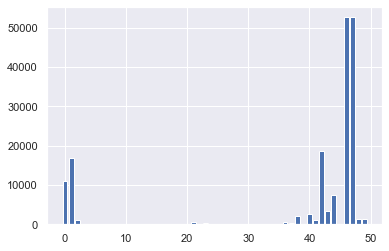

<ipython-input-22-efc22b1676c5>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


RandomForestClassifier(max_depth=21, min_samples_leaf=4, n_estimators=200)

In [22]:
dummies_Gender=pd.get_dummies(df_yes['Gender'])
dummies_Region=pd.get_dummies(df_yes['Region_Code'])
dummies_Occupation=pd.get_dummies(df_yes['Occupation'])
dummies_Channel=pd.get_dummies(df_yes['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_yes['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_yes['Is_Active'])

df_yes['Gender_Male']=dummies_Gender['Male']
df_yes['Gender_Female']=dummies_Gender['Female']


df_yes[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]



df_yes['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_yes['Occupation_Other']=dummies_Occupation['Other']
df_yes['Occupation_Salaried']=dummies_Occupation['Salaried']
df_yes['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_yes['Channel_X1']=dummies_Channel['X1']
df_yes['Channel_X2']=dummies_Channel['X2']
df_yes['Channel_X3']=dummies_Channel['X3']
df_yes['Channel_X4']=dummies_Channel['X4']
df_yes['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_yes['CreditProduct_No']=dummies_CreditProduct['No']
df_yes['IsActive_Yes']=dummies_IsActive['Yes']
df_yes['IsActive_No']=dummies_IsActive['No']


df_yes=df_yes.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)


X=df_yes[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
       'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258',
       'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266',
       'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274',
       'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'Channel_X4', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y=df_yes[['Is_Lead']]

X['Avg_Account_Balance'] = np.log(X['Avg_Account_Balance'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, np.ravel(Y), test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
col=X.columns
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (col[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()




X1=df_yes[['Age', 'Vintage', 'Avg_Account_Balance',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
Y1=df_yes['Is_Lead']
X1['Avg_Account_Balance'] = np.log(X1['Avg_Account_Balance'])


rf_tuned= RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_depth=21,
 bootstrap=True)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)
rf_tuned.fit(X_train_scaled1, np.ravel(Y))




In [23]:
df_test=pd.read_csv('test_mSzZ8RL.csv')
df_test['Credit_Product'].replace(np.nan,'Yes',inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [24]:
df_yes_test=df_test.copy()


dummies_Gender=pd.get_dummies(df_yes_test['Gender'])
dummies_Region=pd.get_dummies(df_yes_test['Region_Code'])
dummies_Occupation=pd.get_dummies(df_yes_test['Occupation'])
dummies_Channel=pd.get_dummies(df_yes_test['Channel_Code'])
dummies_CreditProduct=pd.get_dummies(df_yes_test['Credit_Product'])
dummies_IsActive=pd.get_dummies(df_yes_test['Is_Active'])
df_yes_test['Gender_Male']=dummies_Gender['Male']
df_yes_test['Gender_Female']=dummies_Gender['Female']
df_yes_test[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]=dummies_Region[['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265',
       'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273',
       'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281',
       'RG282', 'RG283', 'RG284']]
df_yes_test['Occupation_Entrepreneur']=dummies_Occupation['Entrepreneur']
df_yes_test['Occupation_Other']=dummies_Occupation['Other']
df_yes_test['Occupation_Salaried']=dummies_Occupation['Salaried']
df_yes_test['Occupation_Self_Employed']=dummies_Occupation['Self_Employed']
df_yes_test['Channel_X1']=dummies_Channel['X1']
df_yes_test['Channel_X2']=dummies_Channel['X2']
df_yes_test['Channel_X3']=dummies_Channel['X3']
df_yes_test['Channel_X4']=dummies_Channel['X4']
df_yes_test['CreditProduct_Yes']=dummies_CreditProduct['Yes']
df_yes_test['CreditProduct_No']=dummies_CreditProduct['No']
df_yes_test['IsActive_Yes']=dummies_IsActive['Yes']
df_yes_test['IsActive_No']=dummies_IsActive['No']
df_yes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105312 non-null  object
 1   Gender                    105312 non-null  object
 2   Age                       105312 non-null  int64 
 3   Region_Code               105312 non-null  object
 4   Occupation                105312 non-null  object
 5   Channel_Code              105312 non-null  object
 6   Vintage                   105312 non-null  int64 
 7   Credit_Product            105312 non-null  object
 8   Avg_Account_Balance       105312 non-null  int64 
 9   Is_Active                 105312 non-null  object
 10  Gender_Male               105312 non-null  uint8 
 11  Gender_Female             105312 non-null  uint8 
 12  RG250                     105312 non-null  uint8 
 13  RG251                     105312 non-null  uint8 
 14  RG25

In [25]:
df_yes_test=df_yes_test.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)
test_features=df_yes_test[['Age', 'Vintage', 'Avg_Account_Balance', 'RG250',
        'RG252', 'RG254', 'RG256',
       'RG261',  'RG264',  'RG268', 'RG270', 'RG274',
       'RG283', 'RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_X1',
       'Channel_X2', 'Channel_X3', 'CreditProduct_Yes',
       'CreditProduct_No', 'IsActive_Yes', 'IsActive_No']]
test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])



X_test_scaled = scaler.fit_transform(test_features)
df_test['Is_Lead_rf_tuned']=rf_tuned.predict(X_test_scaled)
df_output1=pd.DataFrame()
df_output1[['ID','Is_Lead']]=df_test[['ID','Is_Lead_rf_tuned']]
df_output1.to_csv('Output_rf_tune_scaled_yes.csv',index=False)

<ipython-input-25-7fe679b496ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Avg_Account_Balance'] = np.log(test_features['Avg_Account_Balance'])


# Neural network

In [36]:
type(X_train_scaled1)

numpy.ndarray